# builelibの実行

## 0.ライブラリの読み込み

In [1]:
from builelib.inputdata_make_ver2 import inputdata_make

import builelib.builelib_common as bc
import builelib.shading as shading

from builelib.airconditioning import airconditioning
from builelib.ventilation import ventilation
from builelib.lighting import lighting
from builelib.hotwatersupply import hotwatersupply
from builelib.elevetor import elevetor


import pprint as pp
import matplotlib.pyplot as plt
%matplotlib inline

## 0.入力ファイルの読み込み

In [2]:
# 入力ファイル指定
inputfileName = './sample/WEBPRO_inputSheet_for_Ver2.xlsm'

# 入力ファイルの読み込み
inputdata = inputdata_make(inputfileName)

# バリデーション
# bc.inputdata_validation(inputdata)

# 出力
# pp.pprint(inputdata)

## 1. 空気調和設備の計算

In [3]:
# 計算実行
resultJson_airconditioning = airconditioning(inputdata)

print(resultJson_airconditioning["airconditioning"])

 2.15521413 2.15521413 2.15521413 2.58625696]
 [0.60053949 0.60053949 0.69618051 0.95122418 1.28671271 1.70264611
  2.19902436 2.30757507 2.30757507 2.30757507 2.76909008]
 [0.64019097 0.64019097 0.69318222 0.91988564 1.21772024 1.58668604
  2.02678302 2.45993601 2.45993601 2.45993601 2.95192321]
 [0.67984244 0.67984244 0.67984244 0.79095416 0.98968109 1.2353055
  1.52782739 1.86724678 2.25356365 2.61229695 3.13475634]
 [0.71949392 0.71949392 0.71949392 0.77231555 0.94192384 1.15129672
  1.40043419 1.68933624 2.01800288 2.38643411 3.31758947]
 [0.7591454  0.7591454  0.7591454  0.76469327 0.91223393 1.09414117
  1.31041497 1.56105534 1.84606227 2.16543577 3.50042259]]
熱源群のエネルギー消費量 MxREFSUBperE: 
 [[0.56088801 0.56088801 0.7064712  0.99676724 1.37910476 1.85348377
  2.15521413 2.15521413 2.15521413 2.15521413 2.58625696]
 [0.60053949 0.60053949 0.69618051 0.95122418 1.28671271 1.70264611
  2.19902436 2.30757507 2.30757507 2.30757507 2.76909008]
 [0.64019097 0.64019097 0.69318222 0.919885

## 2.機械換気設備の計算

In [4]:
# 計算実行
resultJson_ventilation = ventilation(inputdata)

# 計算結果の出力
print(resultJson_ventilation["E_ventilation"])
print(resultJson_ventilation["Es_ventilation"])
print(resultJson_ventilation["BEI_V"])

室名称　1F_便所1
　- 換気代替空調の有無 False
　- 換換気代替空調系統の熱源容量の合計容量 0
　- 換気代替空調系統の給気風量の合計容量 0
　- 換気代替空調系統の排気風量の合計容量 700.0
室名称　1F_便所2
　- 換気代替空調の有無 False
　- 換換気代替空調系統の熱源容量の合計容量 0
　- 換気代替空調系統の給気風量の合計容量 0
　- 換気代替空調系統の排気風量の合計容量 700.0
室名称　1F_物入
　- 換気代替空調の有無 False
　- 換換気代替空調系統の熱源容量の合計容量 0
　- 換気代替空調系統の給気風量の合計容量 0
　- 換気代替空調系統の排気風量の合計容量 100.0
室名称　1F_給湯室
　- 換気代替空調の有無 False
　- 換換気代替空調系統の熱源容量の合計容量 0
　- 換気代替空調系統の給気風量の合計容量 0
　- 換気代替空調系統の排気風量の合計容量 300.0
室名称　1F_休憩室
　- 換気代替空調の有無 False
　- 換換気代替空調系統の熱源容量の合計容量 0
　- 換気代替空調系統の給気風量の合計容量 0
　- 換気代替空調系統の排気風量の合計容量 400.0
室名称　1F_機械室1
　- 換気代替空調の有無 False
　- 換換気代替空調系統の熱源容量の合計容量 0
　- 換気代替空調系統の給気風量の合計容量 4100.0
　- 換気代替空調系統の排気風量の合計容量 4100.0
室名称　1F_機械室2
　- 換気代替空調の有無 False
　- 換換気代替空調系統の熱源容量の合計容量 0
　- 換気代替空調系統の給気風量の合計容量 0
　- 換気代替空調系統の排気風量の合計容量 1100.0
室名称　1F_電気室
　- 換気代替空調の有無 False
　- 換換気代替空調系統の熱源容量の合計容量 0
　- 換気代替空調系統の給気風量の合計容量 2500.0
　- 換気代替空調系統の排気風量の合計容量 2500.0
室名称　2F_便所1
　- 換気代替空調の有無 False
　- 換換気代替空調系統の熱源容量の合計容量 0
　- 換気代替空調系統の給気風量の合計容量 0
　- 換気代替空調系統の排気風量の合計容量 700.0
室名称　2F_便所2
　- 換気代替空調の有無

## 3.照明設備の計算

In [5]:
# 計算実行
resultJson_lighting = lighting(inputdata)

# 計算結果の出力
print(resultJson_lighting["E_lighting"])
print(resultJson_lighting["Es_lighting"])
print(resultJson_lighting["BEI_L"])

3413213.4165440006
4209253.209999998
0.8108833672526918


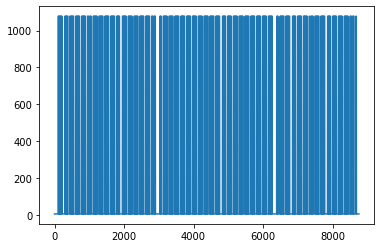

In [6]:
EL_hour = resultJson_lighting["E_lighting_hourly"].flatten()
plt.plot(EL_hour)

## 4. 給湯設備の計算

In [7]:
# 計算実行
resultJson_hotwater = hotwatersupply(inputdata)

# 計算結果の出力
print(resultJson_hotwater["E_hotwatersupply"])

251554.41104156757


## 5. 昇降機の計算

In [8]:
# 計算実行
resultJson_elevetor = elevetor(inputdata)

# 計算結果の出力
print(resultJson_elevetor["E_elevetor"])

室 7F_事務室1 に設置された昇降機
  - 昇降機運転時間 3133.0
室 7F_事務室2 に設置された昇降機
  - 昇降機運転時間 3133.0
室 7F_事務室1 に設置された 1 台目の昇降機
　- 台数  2.0
　- 速度  60.0
　- 積載量  800.0
　- 速度制御方式による係数  0.025
　- エネルギー消費量 kWh/年 8743.255813953489
室 7F_事務室2 に設置された 1 台目の昇降機
　- 台数  2.0
　- 速度  60.0
　- 積載量  800.0
　- 速度制御方式による係数  0.025
　- エネルギー消費量 kWh/年 8743.255813953489
昇降機の一次エネルギー消費量  170668.3534883721  MJ/年
170668.3534883721


## X. 日よけ効果係数の計算

In [9]:
AREA = "6"
Direction = "南"
x1=0
x2=5
x3=0
y1=0
y2=2
y3=0
zxp=2
zxm=2
zyp=2
zym=0

r_wind_SUM, r_wind_WIN = shading.calc_shadingCoefficient(AREA, Direction, x1,x2,x3,y1,y2,y3,zxp,zxm,zyp,zym)

print("日よけ効果係数（冷房）：" + str(r_wind_SUM))
print("日よけ効果係数（暖房）：" + str(r_wind_WIN))

日よけ効果係数（冷房）：0.2588402489212234
日よけ効果係数（暖房）：0.2549932742406615
